In [2]:
!pip install opencv-python

In [11]:
import random
import cv2
from PIL import Image, ImageDraw #Подключим необходимые библиотеки.
from IPython.display import Image as Disp

In [5]:
#imageName = input('image name:') #Считываем Имя изображения.

#if len(imageName) == 0:
imageName = 'temp.jpg'
#print('image name = ' + str(imageName))

image = Image.open(imageName) #Открываем изображение. 
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 	
pix = image.load() #Выгружаем значения пикселей.

Исходное изображение:


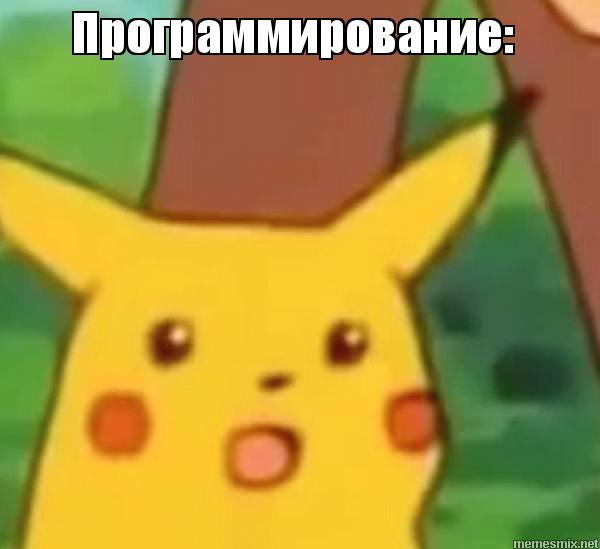

In [6]:
print('Исходное изображение:')
Disp(filename=imageName)

In [7]:
for i in range(width):
    for j in range(height):
        r = pix[i, j][0]
        g = pix[i, j][1]
        b = pix[i, j][2]
        S = round(0.2126 * r) + round(0.7152 * g) + round(0.0722 * b)
        draw.point((i, j), (S, S, S))

In [8]:
image.save("grey.jpg", "JPEG")

В градациях серого:


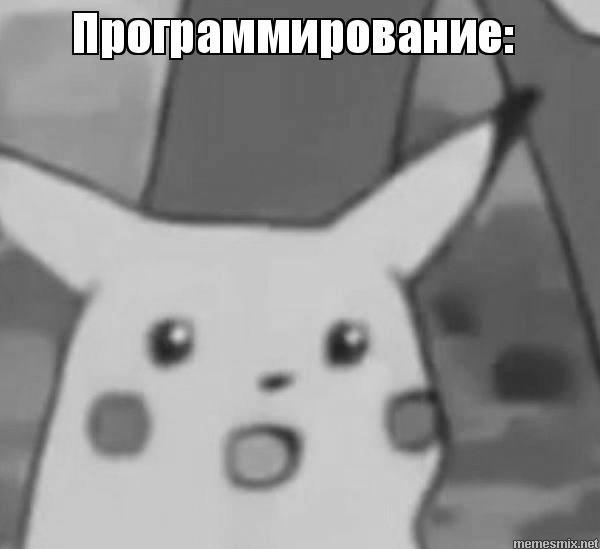

In [9]:
print('В градациях серого:')
Disp(filename='grey.jpg')

# Гамма коррекция:

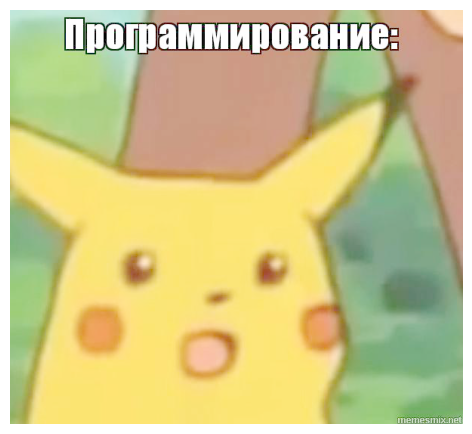

In [10]:
import imageio
import matplotlib.pyplot as plt
# Gamma encoding
pic = imageio.imread(imageName)
gamma = 2.2 # Gamma < 1 ~ Dark ; Gamma > 1 ~ Bright
gamma_correction = ((pic/255) ** (1/gamma))
#plt.figure(figsize = (5,5))
plt.figure(figsize = (6.0,5.49), dpi=100)
plt.imshow(gamma_correction)
plt.axis('off')

#plt.figure(figsize=(6.0,5.49), dpi=100)
plt.savefig('gamma.jpg')

#fig = plt.gcf()
#fig.set_size_inches(6.0, 5.49)
#fig.savefig('gamma.jpg', dpi=100)

#print(gamma_correction)

imgg = Image.open('gamma.jpg') #Открываем изображение. 
drawg = ImageDraw.Draw(imgg) #Создаем инструмент для рисования. 
width = imgg.size[0] #Определяем ширину. 
height = imgg.size[1] #Определяем высоту.
for i in range(width):
    for j in range(height):
        r = int(255 * gamma_correction[j][i][0])
        g = int(255 * gamma_correction[j][i][1])
        b = int(255 * gamma_correction[j][i][2])
        drawg.point((i, j), (r, g, b))


imgg.save("gamma.jpg", "JPEG")

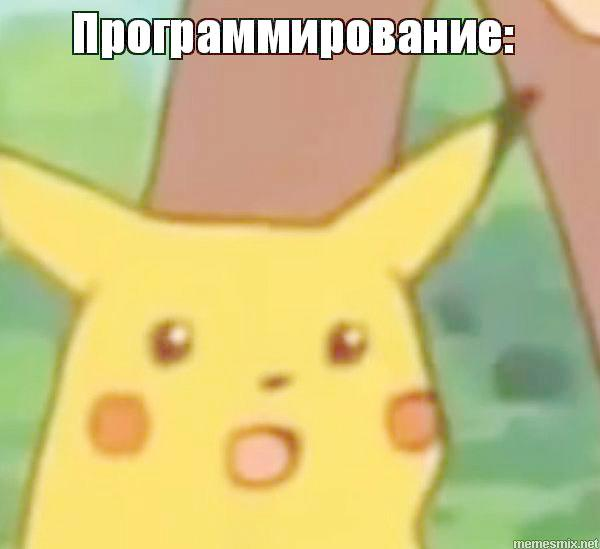

In [12]:
Disp(filename='gamma.jpg')

In [13]:
del draw
del drawg

In [20]:
image = Image.open(imageName) #Открываем изображение.
image2 = Image.open('gamma.jpg')
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 

print('Исходное изображение:')
print('width = {}, height = {}'.format(width, height))

width2 = image2.size[0] #Определяем ширину. 
height2 = image2.size[1] #Определяем высоту. 

print('Линеаризованное изображение:')
print('width = {}, height = {}'.format(width2, height2))

if width != width2 or height != height2:
    print("Error: Sizes are not equalse!")


Исходное изображение:
width = 600, height = 549
Линеаризованное изображение:
width = 600, height = 549


In [21]:
from math import fabs
pix1 = image.load()
pix2 = image2.load()
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 

for i in range(width):
    for j in range(height):
        r = round(fabs(pix1[i, j][0] - pix2[i, j][0]))
        g = round(fabs(pix1[i, j][1] - pix2[i, j][1]))
        b = round(fabs(pix1[i, j][2] - pix2[i, j][2]))
        draw.point((i, j), (r, g, b))

In [22]:
image.save("diff1.jpg", "JPEG")

Разница между исходным изображением и линеаризованным:


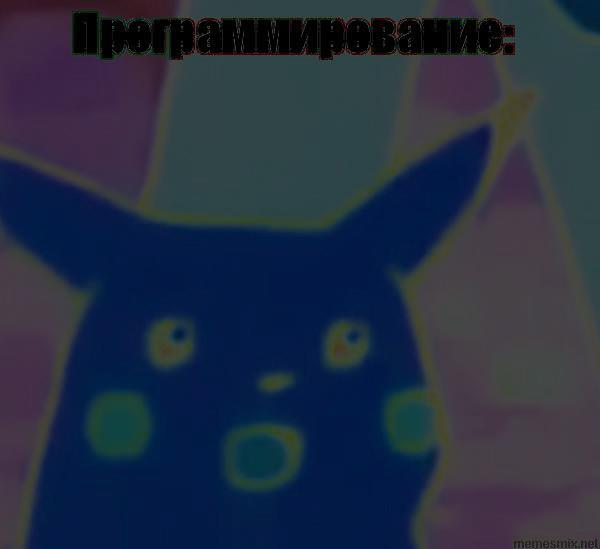

In [23]:
print('Разница между исходным изображением и линеаризованным:')
Disp(filename='diff1.jpg')

In [24]:
del draw

# Перевод цветов изображения из линейного RGB в XYZ с использованием матрицы:

## Самописная функция:

In [31]:
def rgb2lab(inputColor):
    num = 0
    RGB = [0, 0, 0]
    for value in inputColor :
        value = float(value) / 255
        if value > 0.04045 :
            value = ((value + 0.055)/1.055)**2.4
        else :
            value = value / 12.92
        RGB[num] = value * 100
        num = num + 1
    XYZ = [0, 0, 0]

    X = RGB [0] * 0.4124 + RGB [1] * 0.3576 + RGB [2] * 0.1805
    Y = RGB [0] * 0.2126 + RGB [1] * 0.7152 + RGB [2] * 0.0722
    Z = RGB [0] * 0.0193 + RGB [1] * 0.1192 + RGB [2] * 0.9505
    
    XYZ[0] = round(X, 4)
    XYZ[1] = round(Y, 4)
    XYZ[2] = round(Z, 4)

    XYZ[0] = float(XYZ[0]) / 95.047         # ref_X =  95.047   Observer= 2°, Illuminant= D65
    XYZ[1] = float(XYZ[1]) / 100.0          # ref_Y = 100.000
    XYZ[2] = float(XYZ[2]) / 108.883        # ref_Z = 108.883

    num = 0
    for value in XYZ :
        if value > 0.008856 :
            value = value ** (0.3333333333333333)
        else :
            value = (7.787 * value) + (16 / 116)

        XYZ[num] = value
        num = num + 1

    Lab = [0, 0, 0]

    L = ( 116 * XYZ[ 1 ] ) - 16
    a = 500 * ( XYZ[ 0 ] - XYZ[ 1 ] )
    b = 200 * ( XYZ[ 1 ] - XYZ[ 2 ] )

    Lab [0] = round(L, 4)
    Lab [1] = round(a, 4)
    Lab [2] = round(b, 4)

    return Lab

In [35]:
image = Image.open(imageName) #Открываем изображение.
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 

pix = image.load()
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 

for i in range(width):
    for j in range(height):
        colorRes = rgb2lab(pix1[i,j])
        colorRes[0] = round(colorRes[0])
        colorRes[1] = round(colorRes[1])
        colorRes[2] = round(colorRes[2])
        draw.point((i, j), (colorRes[0], colorRes[1], colorRes[2]))

In [36]:
image.save("RGB2XYZ_1.jpg", "JPEG")

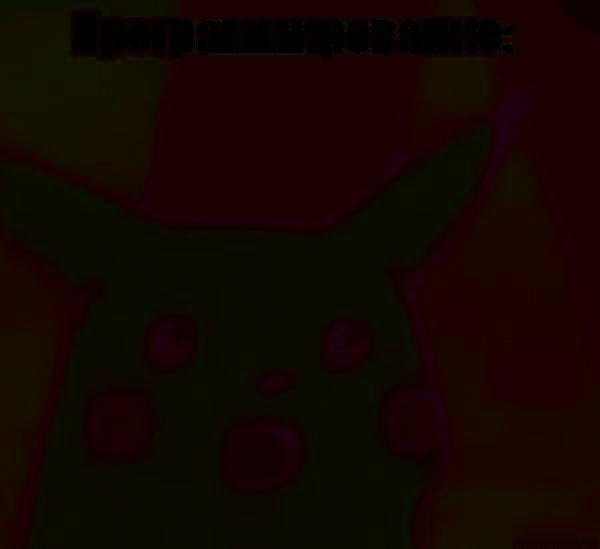

In [37]:
Disp(filename='RGB2XYZ_1.jpg')

## Библиотечное преобразование:

Text(0.5, 1.0, 'image_CIEXYZ')

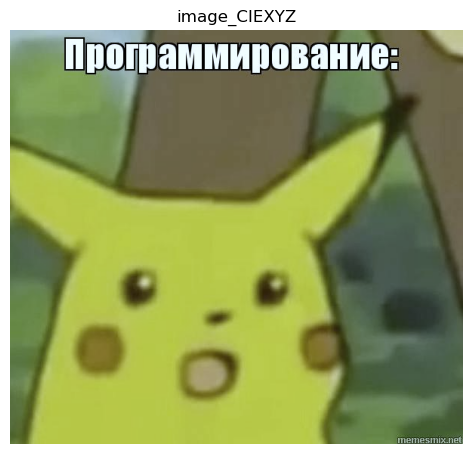

In [27]:
image_RGB = cv2.imread("temp.jpg")
image_CIEXYZ = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2XYZ)
plt.figure(figsize = (6.0,5.49), dpi=100)
plt.imshow(image_CIEXYZ)
plt.axis('off')
plt.title('image_CIEXYZ')